In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Boston

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


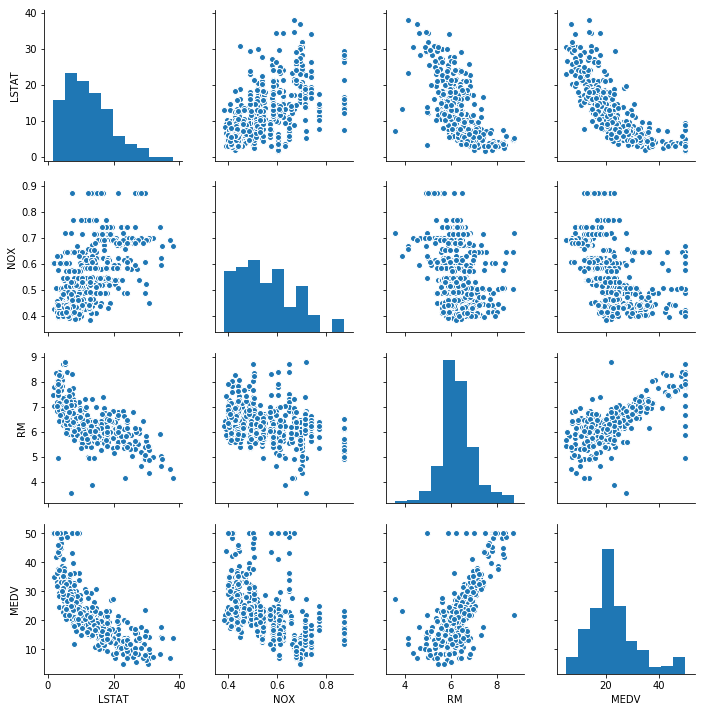

In [7]:
cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()

### Diabetes

In [8]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
df.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [9]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


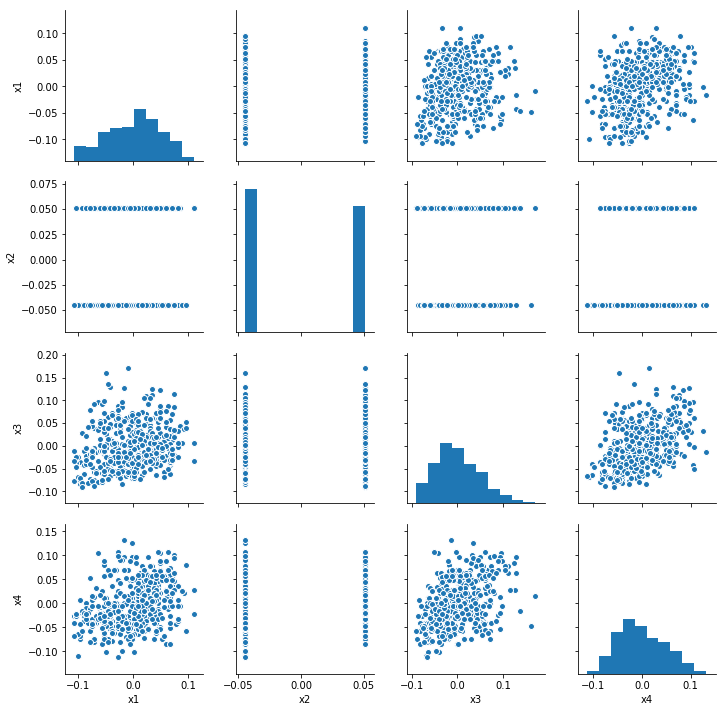

In [10]:
sns.pairplot(df.ix[:,:4])
plt.show()

### Linnerud

In [11]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print(linnerud.DESCR)

Linnerrud dataset

Notes
-----
Data Set Characteristics:
    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *exercise*: A list containing the following components: exercise data with
  20 observations on 3 exercise variables: Weight, Waist and Pulse.

- *physiological*: Data frame with 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

References
----------
  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [12]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


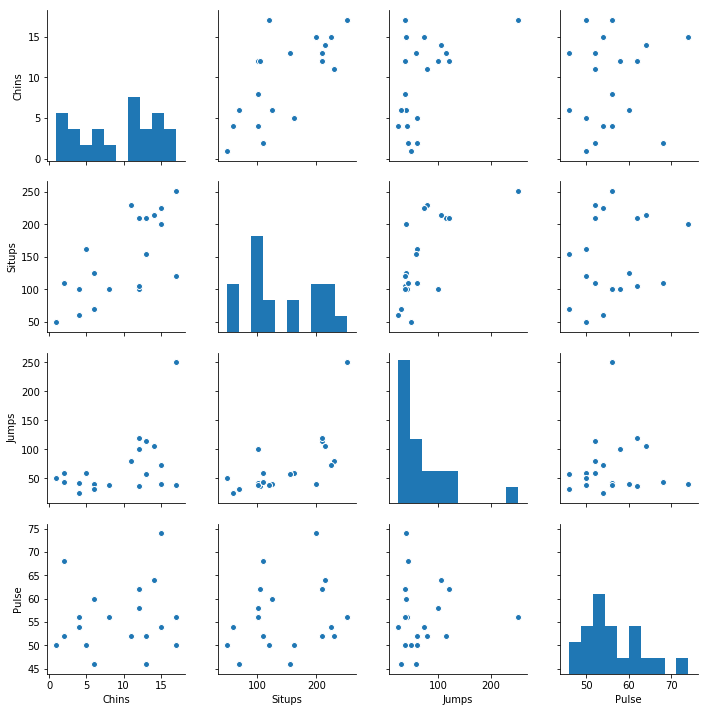

In [14]:
sns.pairplot(df.iloc[:,[0,1,2,-1]])
plt.show()

### 회귀분석용 가상 데이터 생성 방법

In [16]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0)

In [17]:
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [18]:
y

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [19]:
w

array(79.17250381)

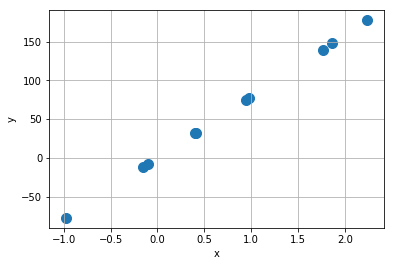

In [20]:
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

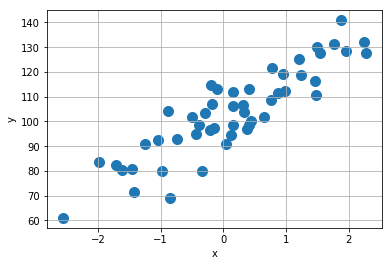

In [21]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### - 가장 중요한 가정: disturbance는 정규분포를 따른다

#### 1. make_regression과 같은 기능을 하는 함수 make_regression2를 만들어라. 단 make_regression2는 coef=True 라고 가정한다. 즉 항상 가중치 계수를 반환한다. 또한 1차원 독립 변수만 생성할 수 있으므로 다음과 같은 인수만 가진다.

- n_samples
- bias
- noise
- random_state

#### 2. make_regression2 함수에 coef 인수를 추가하여 make_regression3 함수를 만들어라. make_regression3 함수는 가중치를 스스로 생성하지 않고 coef 인수로 받은 가중치 계수 값을 그대로 사용하며 가중치 계수를 반환하지 않는다.

In [100]:
def make_regression2(n_samples, bias, noise, random_state, coef=True):
    np.random.seed(random_state)
    X = np.random.randn(n_samples, 1)
    w = np.random.randn(n_samples) + np.random.randint(-100,100,1)
    e = np.random.randn(n_samples) + noise 
    y = bias + np.dot(w.T,X) + e
    
    return X, y, w


In [101]:
make_regression2(10, 3, 4, 0)

(array([[ 1.76405235],
        [ 0.40015721],
        [ 0.97873798],
        [ 2.2408932 ],
        [ 1.86755799],
        [-0.97727788],
        [ 0.95008842],
        [-0.15135721],
        [-0.10321885],
        [ 0.4105985 ]]),
 array([-659.58256688, -660.94669325, -661.24203776, -662.14610767,
        -660.58588461, -661.95990292, -661.62136025, -661.52231358,
        -662.05892797, -661.61978066]),
 array([-90.85595643, -89.54572649, -90.23896227, -90.87832498,
        -90.55613677, -90.66632567, -89.50592093, -91.20515826,
        -90.6869323 , -91.85409574]))

ValueError: x and y must be the same size

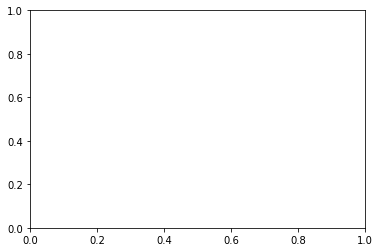

In [102]:
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### Bias augmentation

In [68]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

In [69]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [70]:
# 바이어스 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [72]:
# tatsModels에서 바이어스 오그멘테이션을 위한 add_constant 함수 제공

import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

### NumPy를 이용한 선형회귀분석

In [88]:
bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [89]:
coef

array(80.71051956)

In [90]:
# y=100+80.7105x+엡실론

In [91]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[102.02701439],
       [ 81.59750943]])

In [92]:
# y^=102.0270+81.5975x

In [94]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y, rcond=None)[0]
w

array([[102.02701439],
       [ 81.59750943]])

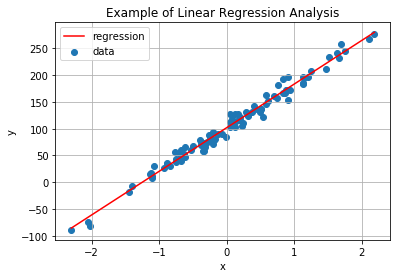

In [96]:
#1,2번째 줄에 저 regression(빨간 선) 그리는 법이 나와 있음. 꼭 알아둘 것! 저건 임의로 그려주는 선

x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션 
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.grid(True)
plt.show()

### Scikit-Learn 패키지를 사용한 선형회귀분석

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
# LinearRegression 클래스 객체 생성
# 상수항이 없으면 fit_intercept=False로 설정
model = LinearRegression(fit_intercept=True)

In [107]:
# fit 메서드로 모형 추정. 오그멘테이션을 자동으로 해주므로 사용자가 오그멘테이션을 할 필요는 없다
model = model.fit(X, y)

In [ ]:
# predict 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
y_new = model.predict(x_new)

In [109]:
model_boston = LinearRegression().fit(boston.data, boston.target)

In [110]:
model_boston.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [111]:
model_boston.intercept_

36.491103280363134

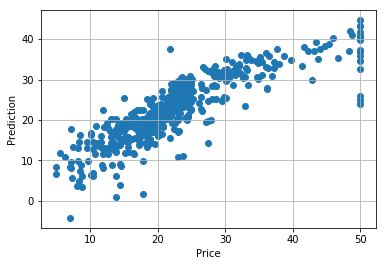

In [113]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"Price")
plt.ylabel(u"Prediction")
plt.grid(True)
plt.show()

1. LinearRegression 클래스를 사용하여 위에서 구한 1차원 가상 데이터 X, y를 회귀분석한다.
2. 이렇게 구한 가중치 계수들의 값은 올바른 값에 대해 어느 정도의 오차를 보이는가?
3. 시드값을 다르게 하여 새로운 가상 데이터 X, y를 만들고 회귀분석을 한다. 이번에는 가중치 계수의 오차가 어떻게 달라졌는가? 가중치 계수의 오차는 일반적으로 어느 정도의 크기를 가지는가?

### StatsModels 를 사용한 선형회귀분석

In [ ]:
model = OLS(y, X)

In [ ]:
# fit 메서드로 모형 추정. Scikit-Learn 패키지와 달리 추정 결과는 별도의 RegressionResults 클래스 객체로 출력된다.
result = model.fit()

In [ ]:
# RegressionResults 클래스 객체는 결과 리포트용 summary 메서드와 예측을 위한 prediction 메서드를 제공한다.
print(result.summary())

y_new = result.predict(x_new)
# x_new는 오그멘테이션 해 줘야 함, 예측을 위한 데이터는 추정시와 동일하게 오그멘테이션을 해 주어야 한다.

In [118]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX) # 웬만하면 dfy, dfX 자리에 DataFrame 넣어주는 것이 좋음. 배열 말고!
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 23 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        12:53:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

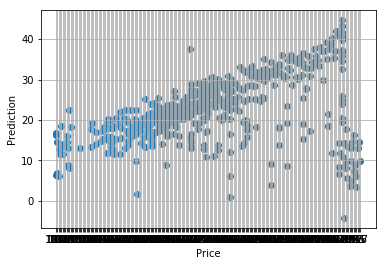

In [120]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"Price")
plt.ylabel(u"Prediction")
plt.grid(True)
plt.show()